In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored 


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

In [27]:
pd.options.mode.copy_on_write = True 
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [28]:
sns.color_palette("cool_r", n_colors=1)

[(0.4980392156862745, 0.5019607843137255, 1.0)]

In [29]:
sns.set_palette("cool_r")
print(colored('\nAll libraries Configed succesfully.', 'green'))


All libraries Configed succesfully.


## Start of the modelling


In [30]:
data = pd.read_csv("/home/r0h17h/ml-proj/wine-quality-prediction/datasets/wine-quality White.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [32]:
data.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.000000,6.854788,0.843868,3.800000,6.300000,6.800000,7.300000,14.200000
volatile acidity,4898.000000,0.278241,0.100795,0.080000,0.210000,0.260000,0.320000,1.100000
citric acid,4898.000000,0.334192,0.121020,0.000000,0.270000,0.320000,0.390000,1.660000
residual sugar,4898.000000,6.391415,5.072058,0.600000,1.700000,5.200000,9.900000,65.800000
chlorides,4898.000000,0.045772,0.021848,0.009000,0.036000,0.043000,0.050000,0.346000
free sulfur dioxide,4898.000000,35.308085,17.007137,2.000000,23.000000,34.000000,46.000000,289.000000
total sulfur dioxide,4898.000000,138.360657,42.498065,9.000000,108.000000,134.000000,167.000000,440.000000
density,4898.000000,0.994027,0.002991,0.987110,0.991723,0.993740,0.996100,1.038980
pH,4898.000000,3.188267,0.151001,2.720000,3.090000,3.180000,3.280000,3.820000
sulphates,4898.000000,0.489847,0.114126,0.220000,0.410000,0.470000,0.550000,1.080000


In [33]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [34]:
data.rename(columns = {"fixed acidity": "fixed_acidity",
                       "volatile acidity": "volatile_acidity",
                       "citric acid": "citric_acid",
                       "residual sugar": "residual_sugar",
                       "chlorides": "chlorides",
                       "free sulfur dioxide": "free_sulfur_dioxide",
                       "total sulfur dioxide": "total_sulfur_dioxide"},
            inplace = True)


In [35]:
columns = list(data.columns)

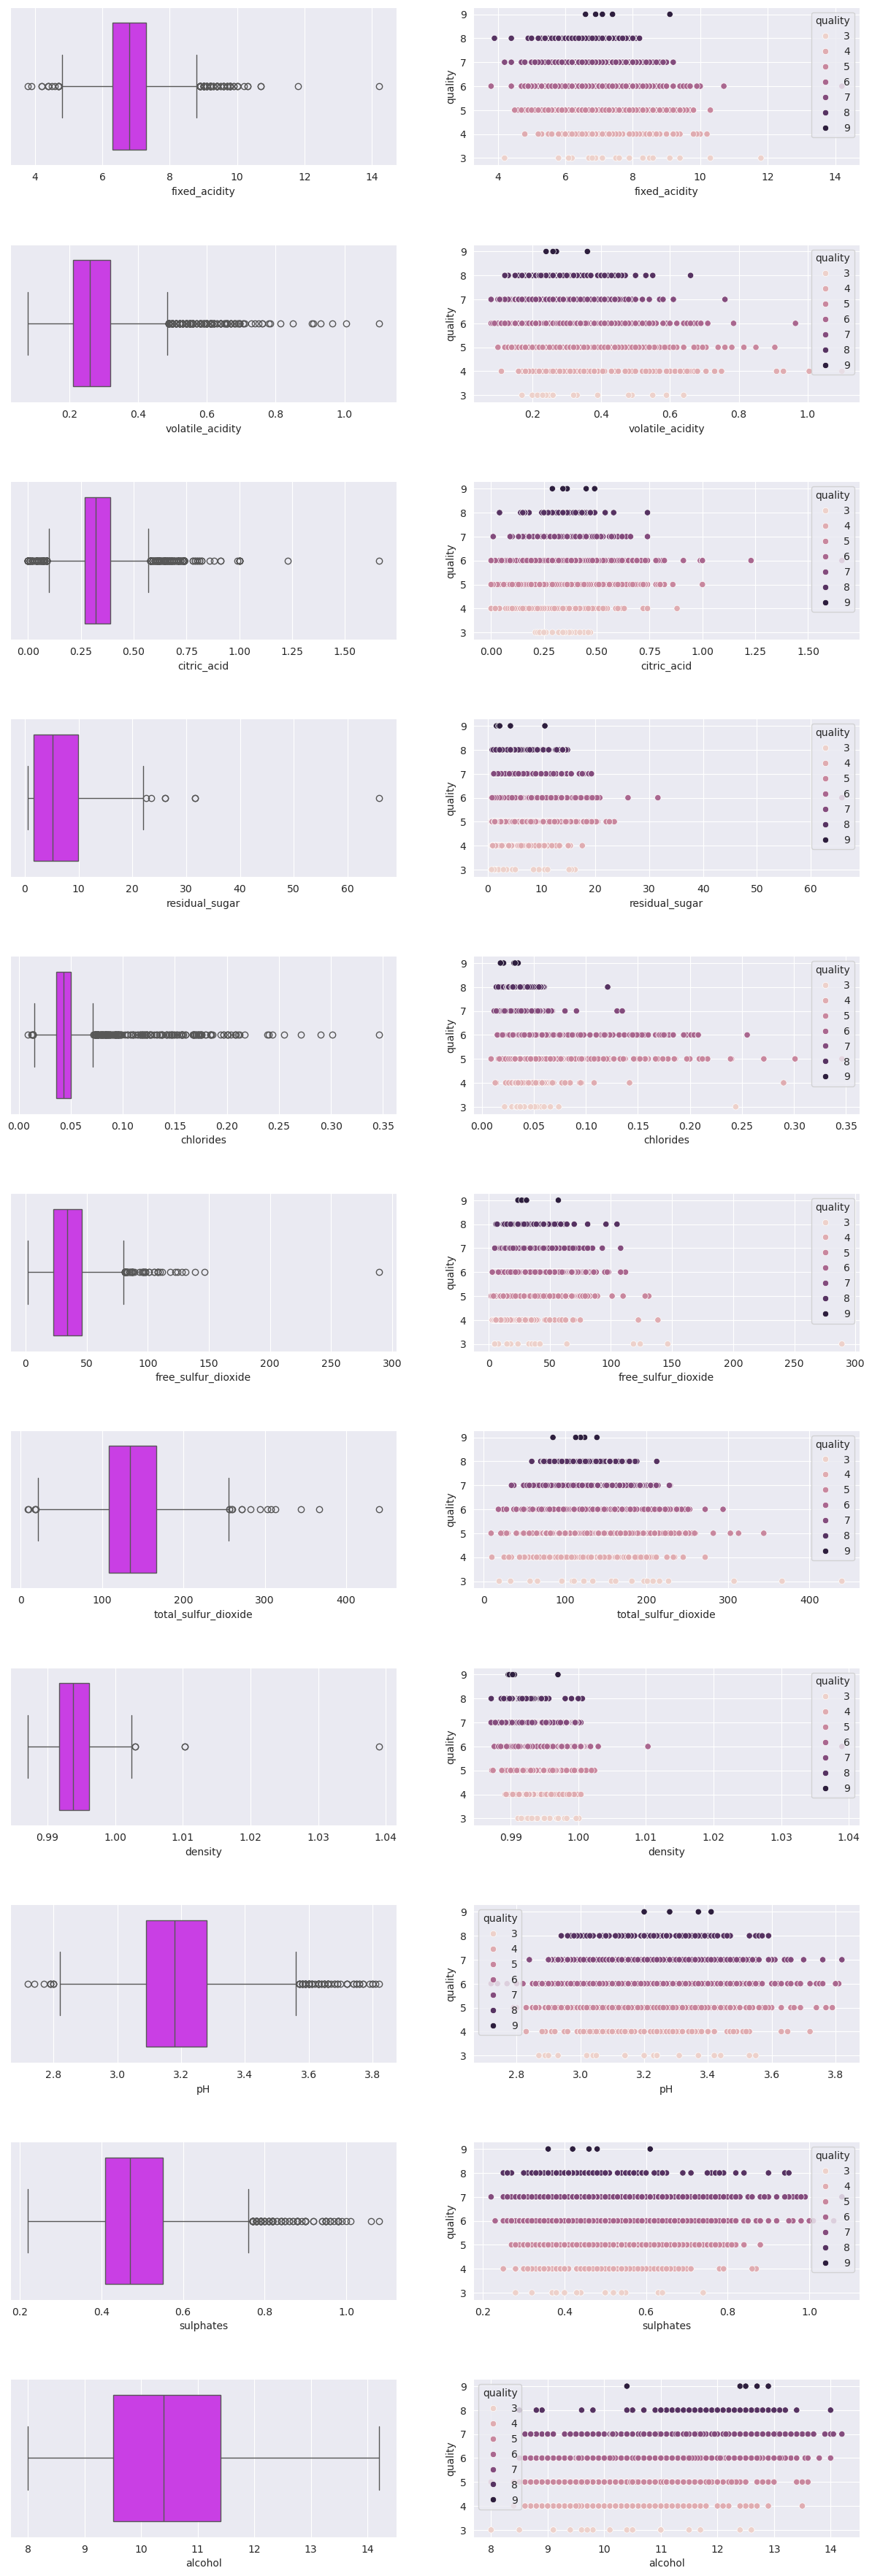

In [36]:
fig, ax = plt.subplots(11, 2, figsize=(15, 45))
plt.subplots_adjust(hspace = 0.5)
for i in range(11) :
    # AX 1
    sns.boxplot(x=columns[i], data=data, ax=ax[i, 0])
    # Ax 2
    sns.scatterplot(x=columns[i], y='quality', data=data, hue='quality', ax=ax[i, 1])

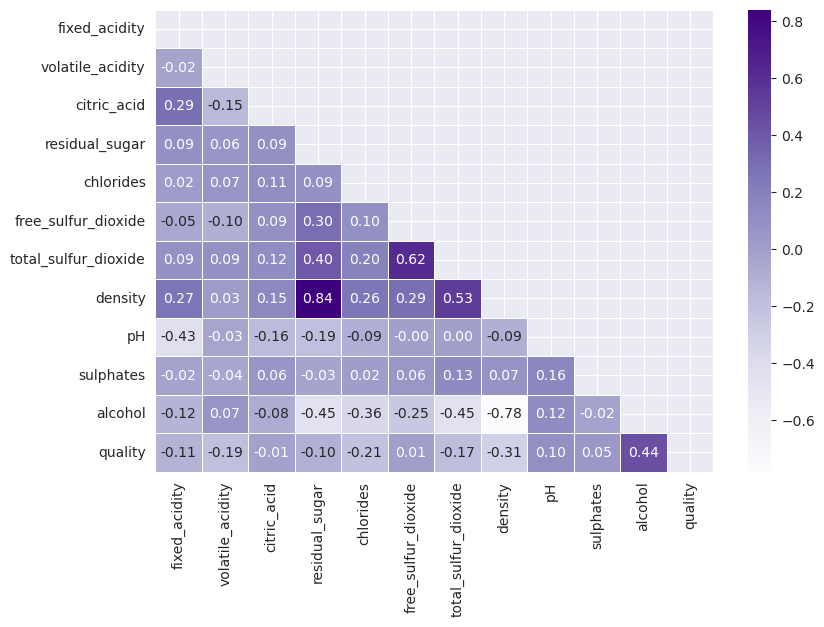

In [37]:
corr = data.corr()
# cmap = sns.diverging_palette(-1, 1, s=100, l=50, n=15, center="dark", as_cmap=True)
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, fmt='.2f', linewidth=0.5, cmap='Purples', mask=np.triu(corr))
plt.show()

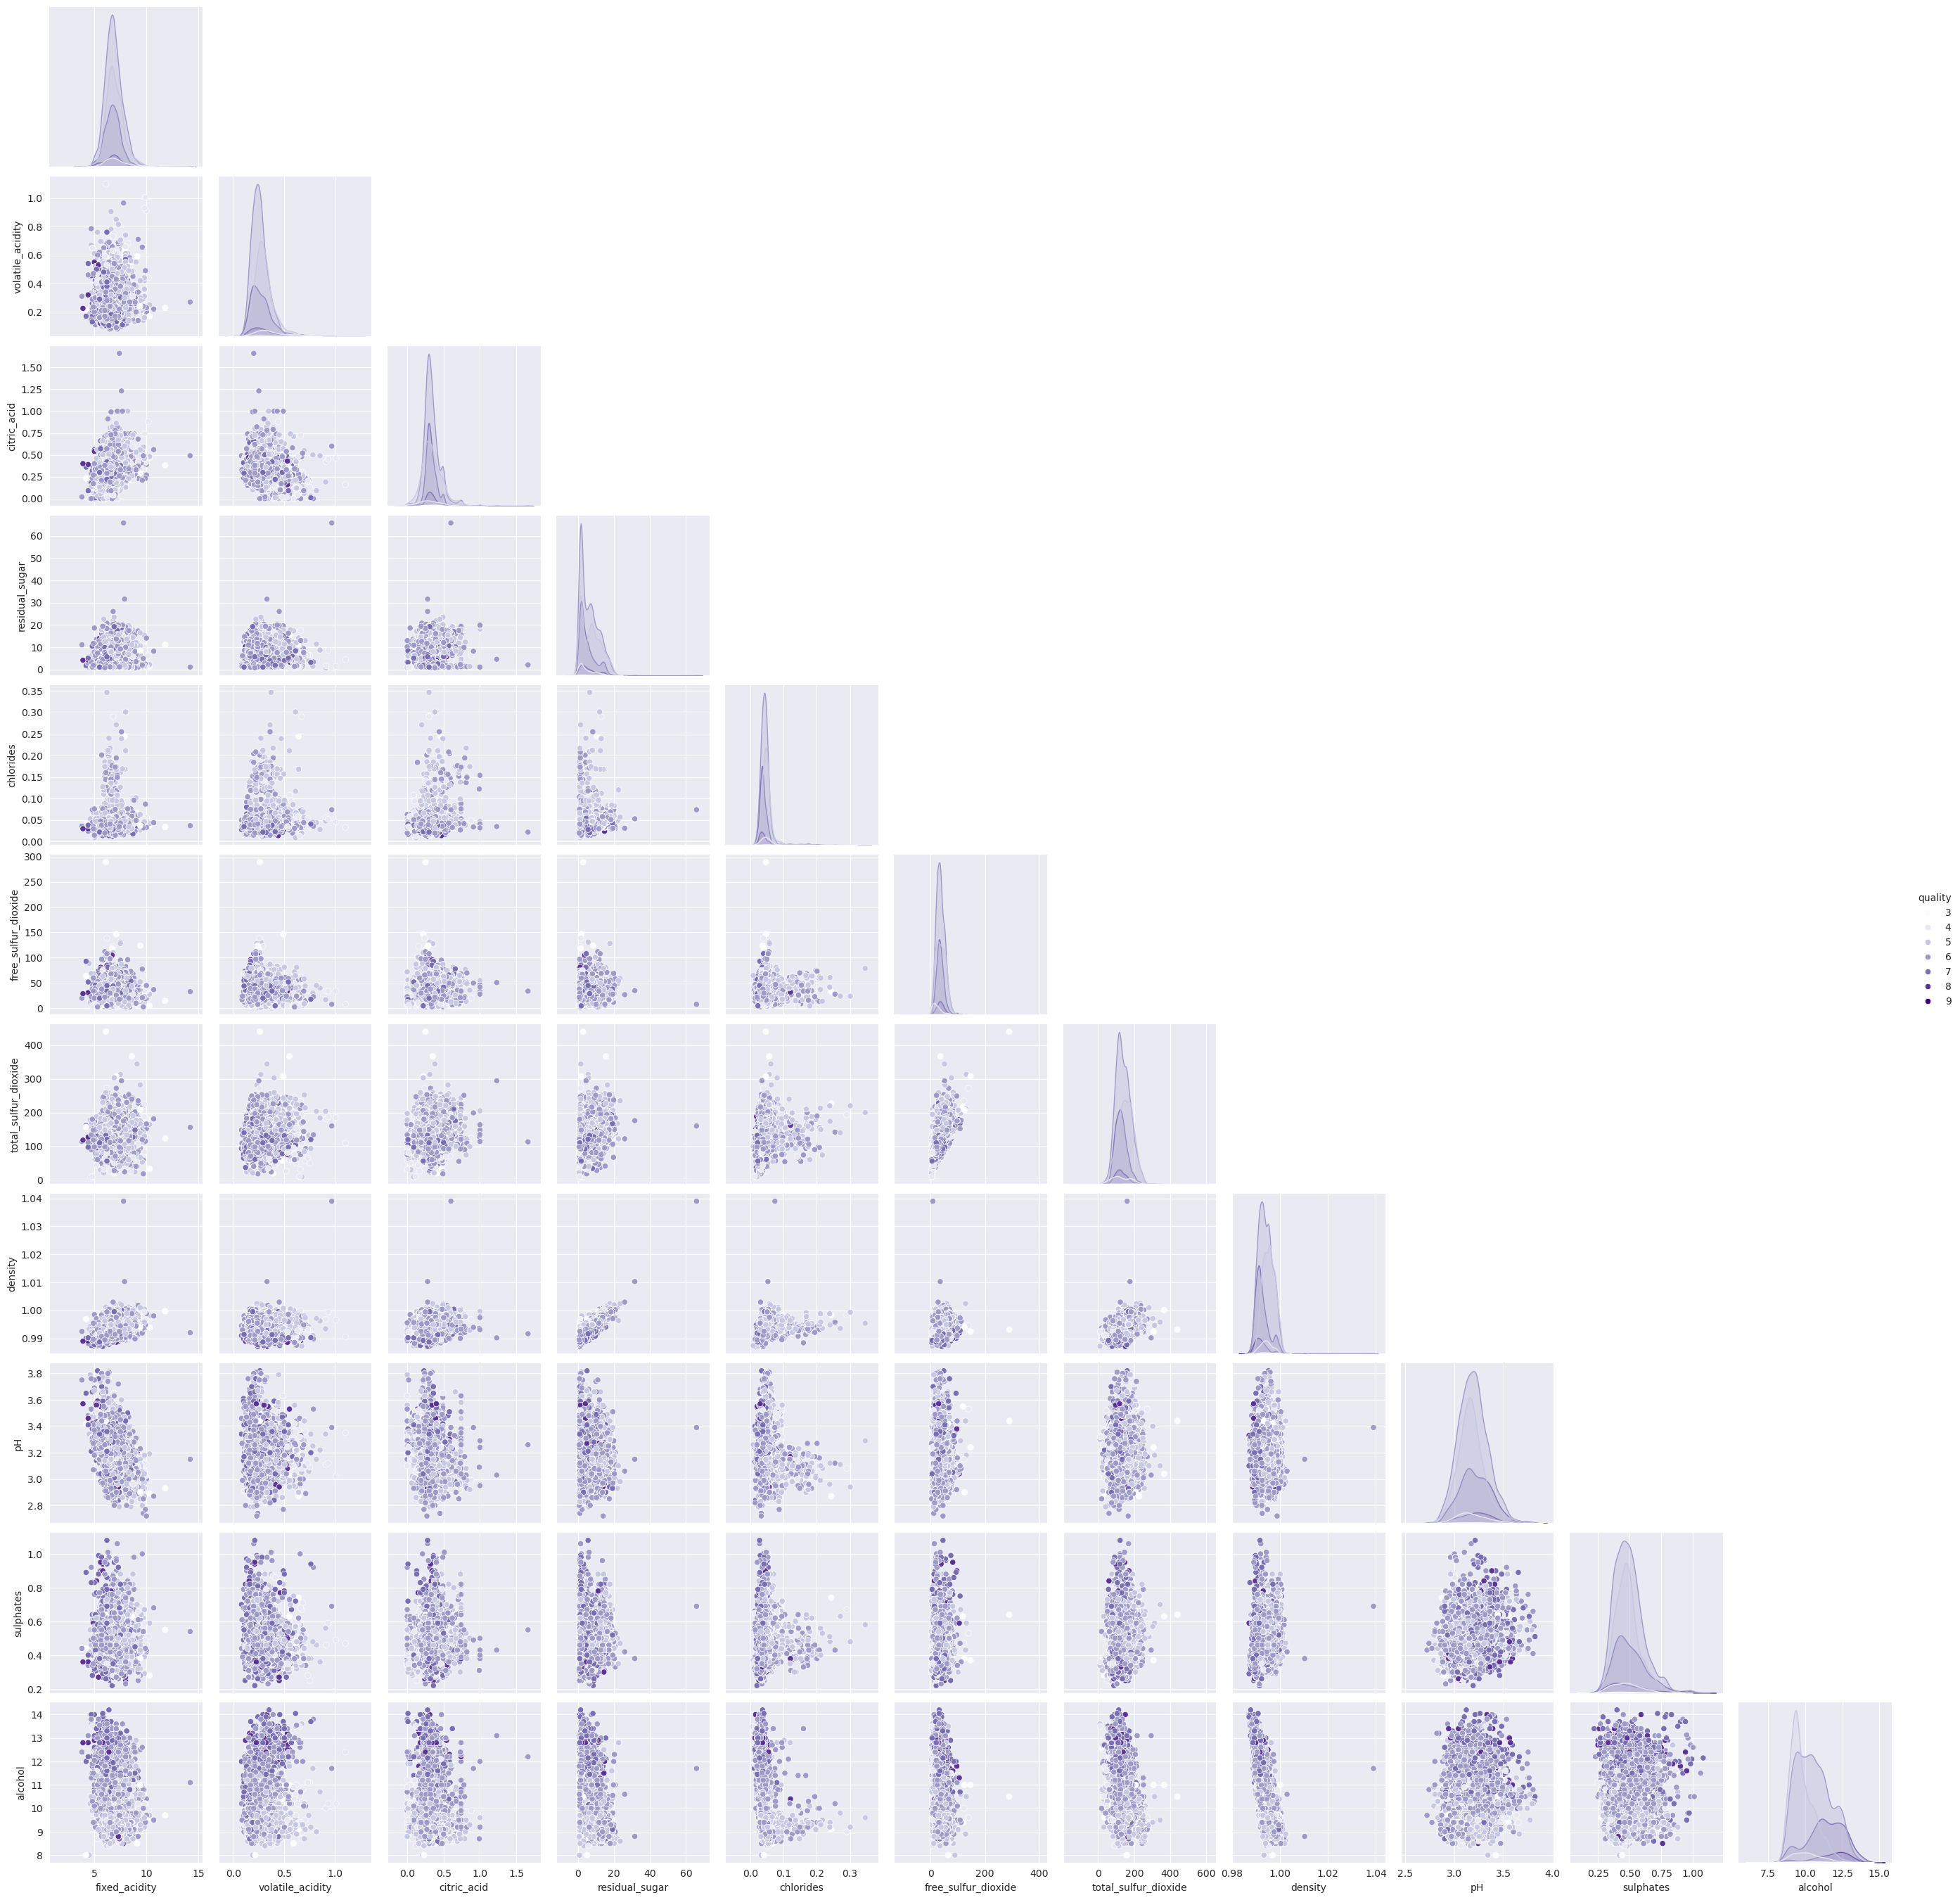

In [38]:
sns.pairplot(data, hue='quality', corner = True, palette='Purples')

In [39]:
data.quality.unique()

array([6, 5, 7, 8, 4, 3, 9])

In [40]:
data = data.replace({'quality' : {
                                    8 : 'Good',
                                    7 : 'Good',
                                    6 : 'Middle',
                                    5 : 'Middle',
                                    4 : 'Bad',
                                    3 : 'Bad',
        }}
)

In [41]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Middle
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Middle
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Middle
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Middle
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Middle


In [42]:
X_temp = data.drop(columns='quality')
y = data.quality

In [43]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_temp)
X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe().T.style.background_gradient(axis=0, cmap='Purples')

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,4898.000000,0.293730,0.081141,0.000000,0.240385,0.288462,0.336538,1.000000
volatile_acidity,4898.000000,0.194354,0.098818,0.000000,0.127451,0.176471,0.235294,1.000000
citric_acid,4898.000000,0.201320,0.072903,0.000000,0.162651,0.192771,0.234940,1.000000
residual_sugar,4898.000000,0.088825,0.077792,0.000000,0.016871,0.070552,0.142638,1.000000
chlorides,4898.000000,0.109117,0.064831,0.000000,0.080119,0.100890,0.121662,1.000000
free_sulfur_dioxide,4898.000000,0.116056,0.059258,0.000000,0.073171,0.111498,0.153310,1.000000
total_sulfur_dioxide,4898.000000,0.300141,0.098603,0.000000,0.229698,0.290023,0.366589,1.000000
density,4898.000000,0.133360,0.057662,0.000000,0.088924,0.127820,0.173318,1.000000
pH,4898.000000,0.425697,0.137273,0.000000,0.336364,0.418182,0.509091,1.000000
sulphates,4898.000000,0.313775,0.132704,0.000000,0.220930,0.290698,0.383721,1.000000


# Modelling


In [44]:
def plot_confusion_matrix(y_test, y_prediction):
    '''Plotting Confusion Matrix'''
    cm = metrics.confusion_matrix(y_test, y_prediction)
    ax = plt.subplot()
    ax = sns.heatmap(cm, annot=True, fmt='', cmap="Purples")
    ax.set_xlabel('Prediced labels', fontsize=18)
    ax.set_ylabel('True labels', fontsize=18)
    ax.set_title('Confusion Matrix', fontsize=25)
    ax.xaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    ax.yaxis.set_ticklabels(['Bad', 'Good', 'Middle']) 
    plt.show()


In [45]:
def clfr_plot(y_test, y_pred) :
    ''' Plotting Classification report'''
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred_rf, digits=3,
                                            output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    sns.heatmap(cr, cmap='Purples', annot=True, linecolor='white', linewidths=0.5).xaxis.tick_top()

In [46]:
def clf_plot(y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap="Purples", ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    ax[0].yaxis.set_ticklabels(['Bad', 'Good', 'Middle'])
    
    ax[1] = sns.heatmap(cr, cmap='Purples', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

In [47]:
data.quality.value_counts()

quality
Middle    3655
Good      1055
Bad        183
9            5
Name: count, dtype: int64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Logistic Regression

In [49]:
parameters = {
    'C' : [0.001, 0.01, 0.1, 1.0, 10, 100, 1000],
    'class_weight' : ['balanced'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10).fit(X_train, y_train)

print('Tuned hyper parameters : ', lr_cv.best_params_)
print('accuracy : ', lr_cv.best_score_)

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

NameError: name 'lr_cv' is not defined

In [ ]:
y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print('LogisticRegression score : ', lr_score)

LogisticRegression score :  0.85


In [ ]:
clf_plot(y_pred_lr)

NameError: name 'metrics' is not defined